In [79]:
import numpy as np
import matplotlib.pylab as plt
import sklearn
from skimage import io
import tensorflow as tf
%matplotlib inline

from load_animals import *
from influence.iter_attack import get_projection_to_box_around_orig_point
from influence.inceptionModel import BinaryInceptionModel
from data_poisoning import data_poisoning

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
img_side = 299
num_channels = 3
batch_size = 100
initial_learning_rate = 0.001 
keep_probs = None
decay_epochs = [1000, 10000]
weight_decay = 0.001

In [87]:
training_dataset_classes = ["dog", "fish"]
num_train_ex_per_class = 900
num_test_ex_per_class = 300
num_classes = len(training_dataset_classes)
num_training_points = num_train_ex_per_class * num_classes
num_testing_points = num_test_ex_per_class * num_classes
poisoned_training_points = []
poisoned_training_points_indices = [999]
target_test_points_indices = [15]
num_target_test_points = len(target_test_points_indices)
method = "FC" # or "FC"

In [80]:
imgs_to_poison, poisoned_images = data_poisoning(data_selected = training_dataset_classes, 
                                                 num_train_ex_per_class=num_train_ex_per_class, 
                                                 num_test_ex_per_class=num_test_ex_per_class,
                                                 use_IF = True,
                                                 target_test_idx = target_test_points_indices,
                                                 num_to_perterb = 3,
                                                 target_labels = None)

Loading animals from disk...
../data/dataset_dog-fish_train-900_test-300.npz
*** Full:
self.logits Tensor("Shape:0", shape=(2,), dtype=int32)


[genericNeuralNet.py:191 -   get_vec_to_list_fn() ] Total number of parameters: 2048


wrong_labels_bool Tensor("Shape_2:0", shape=(2,), dtype=int32)
logits Tensor("Shape_3:0", shape=(2,), dtype=int32)
inception_features:  Tensor("flatten/Reshape:0", shape=(?, ?), dtype=float32)
x_poison_features:  Tensor("Gather:0", shape=(1, ?), dtype=float32)
t_target_features:  Tensor("Gather_1:0", shape=(1, ?), dtype=float32)
Lp:  Tensor("norm/Squeeze:0", shape=(), dtype=float32)
LP_gradient Tensor("strided_slice_1:0", shape=(268203,), dtype=float32)
Inception features do not exist. Generating train...
1800 50
Shape (1800, 2048)
Inception features do not exist. Generating test...
600 50
Shape (600, 2048)
*** Top:
self.logits Tensor("Shape:0", shape=(2,), dtype=int32)


[genericNeuralNet.py:191 -   get_vec_to_list_fn() ] Total number of parameters: 2048


wrong_labels_bool Tensor("Shape_2:0", shape=(2,), dtype=int32)
logits Tensor("Shape_3:0", shape=(2,), dtype=int32)
Using normal model


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012129042
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0039761304
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.048454043
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 3.6090535e-07
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0380473


LBFGS training took [41] iter.
After training with LBFGS: 


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: [0.01212904]
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: [0.00397613]
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: [0.04845405]
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  [1.]
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   [0.985]
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 3.601115e-07
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0380473


Creating poisoned dataset...
('step_size is', 0.02)
****** Attacking test_idx [15] ******
Total number of parameters: 2048
         Current function value: -1.248286
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 75
         Hessian evaluations: 44
Inverse HVP took 2.10997104645 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000521898269653 sec
Entering the for loop
finished calculating grad_wrt_input_val


[iter_attack.py:118 -     iterative_attack() ] Test idx: [15], Indices to poison: [1141 1064  374], train label: [1. 0. 0.], test label: 0.0


('all_indices_to_poison: ', array([1141, 1064,  374]))



[iter_attack.py:131 -     iterative_attack() ] Initial Test pred (full): [[0.99251246 0.00748758]]
[iter_attack.py:134 -     iterative_attack() ] Initial Test pred (top): [[0.99251246 0.00748758]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 0


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 0 perturbation shape: (1, 268203), perturbation: [[ 0.00394241 -0.00671595 -0.01361279 ... -0.00039357 -0.00076302
   0.00216335]]


         Current function value: -1.248286
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 75
         Hessian evaluations: 44
Inverse HVP took 2.090020895 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000522136688232 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000596046447754 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 0 perturbation shape: (1, 268203), perturbation: [[-1.15748262e-05 -1.92047877e-03  1.84240416e-04 ... -2.32974906e-03
  -4.65304693e-05  1.66267110e-03]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 0 perturbation shape: (1, 268203), perturbation: [[-0.00476013 -0.00294357  0.00137878 ... -0.0006545   0.0012655
   0.00023699]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581979751587 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012139881
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004014403
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.048243273


Shape (3, 2048)
Using normal model
LBFGS training took [48] iter.
After training with LBFGS: 


[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.00067994674
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.031247
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.99029046 0.00970949]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.99029046 0.00970949]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 1


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 1 perturbation shape: (1, 268203), perturbation: [[ 0.00596445 -0.00762136 -0.01584456 ...  0.00353788 -0.00151733
   0.00115407]]


         Current function value: -2.157501
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 95
         Hessian evaluations: 53
Inverse HVP took 2.60474705696 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000523090362549 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000586986541748 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 1 perturbation shape: (1, 268203), perturbation: [[ 0.00032453 -0.00170526  0.00066658 ... -0.00360521  0.00022839
   0.00222002]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 1 perturbation shape: (1, 268203), perturbation: [[-0.00312363 -0.00145782  0.00150602 ... -0.00078365  0.00181017
   0.00027925]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012164819
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0040574353
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.048073515
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9866666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.001294235
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.026757


Shape (3, 2048)
Using normal model
LBFGS training took [37] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.98805106 0.0119489 ]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.98805106 0.0119489 ]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 2


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 2 perturbation shape: (1, 268203), perturbation: [[ 0.00570024 -0.00711158 -0.01454397 ...  0.00414249 -0.00143971
   0.00057878]]


         Current function value: -3.345073
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 79
         Hessian evaluations: 56
Inverse HVP took 2.28000497818 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000517845153809 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000641822814941 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 2 perturbation shape: (1, 268203), perturbation: [[ 0.00019563 -0.00177367  0.00027443 ... -0.00213569  0.00071534
   0.00085034]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 2 perturbation shape: (1, 268203), perturbation: [[-0.00255795 -0.00138764  0.00151663 ... -0.00050581  0.00093695
   0.00013162]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581979751587 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012192614
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0040948777
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047969
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0017230647
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0243597


Shape (3, 2048)
Using normal model
LBFGS training took [33] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.98580915 0.01419087]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.98580915 0.01419087]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 3


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 3 perturbation shape: (1, 268203), perturbation: [[ 0.00774514 -0.00377257 -0.01027028 ...  0.00554159  0.0011726
  -0.00265684]]


         Current function value: -4.810983
         Iterations: 7
         Function evaluations: 154
         Gradient evaluations: 148
         Hessian evaluations: 56
Inverse HVP took 3.75822210312 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000516176223755 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000594854354858 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 3 perturbation shape: (1, 268203), perturbation: [[-1.92542357e-04 -1.30652008e-03  2.02976531e-04 ... -1.42820994e-03
   2.19982903e-05  5.94506622e-04]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 3 perturbation shape: (1, 268203), perturbation: [[-0.00117326 -0.00061777  0.00092634 ... -0.00035705  0.00021877
   0.00020132]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581026077271 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012216141
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004120615
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047950786
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0019521384
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.023811


Shape (3, 2048)
Using normal model
LBFGS training took [18] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.98352945 0.01647063]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.98352945 0.01647063]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 4


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 4 perturbation shape: (1, 268203), perturbation: [[ 0.01169858  0.00034533 -0.01020212 ...  0.00276849  0.00159538
  -0.00070964]]


         Current function value: -6.569350
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 88
         Hessian evaluations: 48
Inverse HVP took 2.39039802551 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000545024871826 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000586032867432 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 4 perturbation shape: (1, 268203), perturbation: [[ 0.0002334  -0.00082649  0.0004338  ... -0.00132609  0.00017921
   0.0005922 ]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 4 perturbation shape: (1, 268203), perturbation: [[-4.92005958e-04 -2.62098911e-04  4.54128603e-04 ... -1.82142365e-04
   1.55903472e-04  9.38021840e-05]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000631093978882 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012231673
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.00412983
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04792781
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.001945072
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.02538


Shape (3, 2048)
Using normal model
LBFGS training took [31] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9811447  0.01885529]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9811447  0.01885529]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 5


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 5 perturbation shape: (1, 268203), perturbation: [[ 0.01118899  0.00763264  0.00277957 ... -0.00319945  0.00209638
   0.00072676]]


         Current function value: -8.681936
         Iterations: 5
         Function evaluations: 73
         Gradient evaluations: 66
         Hessian evaluations: 35
Inverse HVP took 1.8251209259 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000519037246704 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000593900680542 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 5 perturbation shape: (1, 268203), perturbation: [[-3.63530125e-06 -3.37450270e-04  3.14840945e-05 ... -1.06178748e-03
   4.52399050e-04 -7.14059570e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 5 perturbation shape: (1, 268203), perturbation: [[-1.59760122e-04 -1.41566707e-04  1.74606408e-04 ... -9.25893473e-05
   2.35066327e-05  1.32974592e-05]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012243386
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041321567
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047927078
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0018393131
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.027712


Shape (3, 2048)
Using normal model
LBFGS training took [40] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9786719  0.02132804]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9786719  0.02132804]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 6


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 6 perturbation shape: (1, 268203), perturbation: [[ 0.01072425  0.00273056 -0.00102728 ... -0.00499604  0.00492227
  -0.00037949]]


         Current function value: -11.141643
         Iterations: 7
         Function evaluations: 129
         Gradient evaluations: 125
         Hessian evaluations: 51
Inverse HVP took 3.20397186279 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00052285194397 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000589847564697 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 6 perturbation shape: (1, 268203), perturbation: [[-0.00028303 -0.00095011 -0.0001451  ... -0.00073428  0.00041484
  -0.00010812]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 6 perturbation shape: (1, 268203), perturbation: [[-1.92533553e-05 -1.81313208e-05  6.53979077e-05 ... -5.18476481e-05
   2.86259146e-05  1.99794467e-05]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000586032867432 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012250664
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041261725
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047889438
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.001637845
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.031003


Shape (3, 2048)
Using normal model
LBFGS training took [39] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.97611 0.02389]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.97611 0.02389]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 7


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 7 perturbation shape: (1, 268203), perturbation: [[ 0.00930104  0.01122225  0.00964211 ... -0.00991343  0.00291327
   0.00060193]]


         Current function value: -13.975969
         Iterations: 8
         Function evaluations: 152
         Gradient evaluations: 145
         Hessian evaluations: 56
Inverse HVP took 3.66718697548 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000518798828125 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00063681602478 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 7 perturbation shape: (1, 268203), perturbation: [[-1.82295305e-04 -5.07342978e-04 -2.21380906e-04 ... -6.67731976e-04
   1.96495108e-04  1.72047257e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 7 perturbation shape: (1, 268203), perturbation: [[-4.23622114e-05 -3.12223674e-05  1.98119687e-05 ... -1.45677377e-05
   2.44088296e-05  4.88360729e-06]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000584840774536 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012260609
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041219695
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047829106
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0014614895
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0345116


Shape (3, 2048)
Using normal model
LBFGS training took [38] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9734542  0.02654579]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9734542  0.02654579]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 8


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 8 perturbation shape: (1, 268203), perturbation: [[ 0.01239265  0.0018231  -0.00715946 ... -0.01314115  0.0038097
   0.00186637]]


         Current function value: -17.206684
         Iterations: 7
         Function evaluations: 130
         Gradient evaluations: 124
         Hessian evaluations: 57
Inverse HVP took 3.37976980209 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000554800033569 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000639915466309 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 8 perturbation shape: (1, 268203), perturbation: [[-3.56473174e-05 -2.02611394e-04 -1.33767571e-05 ... -1.98189402e-04
   1.19282879e-04 -1.27418767e-04]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 8 perturbation shape: (1, 268203), perturbation: [[-1.77264665e-05 -1.23355221e-05  6.56011889e-06 ... -5.21699167e-06
   8.54778682e-06  1.65669178e-07]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000576972961426 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012268914
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041117053
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04783638
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0012254756
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0391107


Shape (3, 2048)
Using normal model
LBFGS training took [36] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.970517   0.02948305]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.970517   0.02948305]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 9


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 9 perturbation shape: (1, 268203), perturbation: [[ 0.01185616  0.00456325  0.00943484 ... -0.00868551  0.01028834
  -0.00759763]]


         Current function value: -21.143711
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 83
         Hessian evaluations: 49
Inverse HVP took 2.27880311012 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000520944595337 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000588178634644 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 9 perturbation shape: (1, 268203), perturbation: [[-9.43248306e-05 -1.57206319e-04 -7.87735553e-06 ...  3.87126674e-05
  -5.22565024e-05 -9.62546546e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 9 perturbation shape: (1, 268203), perturbation: [[-1.15032562e-05 -7.09347250e-06  1.54303507e-06 ... -3.62819901e-06
   3.08318272e-06  1.28781880e-06]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581026077271 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.0122846775
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004109983
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04781455
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0011133805
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0434375


Shape (3, 2048)
Using normal model
LBFGS training took [43] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9673272  0.03267283]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9673272  0.03267283]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 10


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 10 perturbation shape: (1, 268203), perturbation: [[ 0.01109531  0.00760577  0.00894873 ... -0.00731993 -0.01091336
   0.01014191]]


         Current function value: -25.831432
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 82
         Hessian evaluations: 50
Inverse HVP took 2.43893814087 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000565052032471 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000641107559204 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 10 perturbation shape: (1, 268203), perturbation: [[ 1.68016704e-05 -2.31078466e-05  2.38361426e-05 ... -2.75066377e-05
  -1.02397753e-05 -1.87376427e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 10 perturbation shape: (1, 268203), perturbation: [[-1.12316548e-06 -8.31438342e-07  3.30895944e-07 ... -1.39922486e-06
   1.82908173e-06 -3.09674277e-08]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582218170166 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012299351
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004105261
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047832545
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0010505446
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.048231


Shape (3, 2048)
Using normal model
LBFGS training took [40] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9637854  0.03621458]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9637854  0.03621458]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 11


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 11 perturbation shape: (1, 268203), perturbation: [[ 0.00892426  0.01417005  0.01711029 ... -0.01248545  0.0024446
  -0.00150096]]


         Current function value: -31.551445
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 70
         Hessian evaluations: 41
Inverse HVP took 1.95290803909 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000514984130859 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000589847564697 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 11 perturbation shape: (1, 268203), perturbation: [[ 5.38112217e-05  6.24157692e-05  1.66311074e-05 ...  2.31695958e-05
  -3.55289922e-06 -1.43138546e-04]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 11 perturbation shape: (1, 268203), perturbation: [[-9.13943722e-07 -6.32557544e-07  4.91308754e-07 ... -6.34584069e-07
   6.49348578e-07  1.43237457e-07]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000579118728638 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012320229
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004108739
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047850456
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0010874055
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0525274


Shape (3, 2048)
Using normal model
LBFGS training took [40] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9599019  0.04009804]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9599019  0.04009804]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 12


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 12 perturbation shape: (1, 268203), perturbation: [[ 0.01410189  0.02033035  0.01632419 ...  0.0136196  -0.01606211
   0.00508774]]


         Current function value: -38.443016
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 25
         Hessian evaluations: 59
Inverse HVP took 1.06975507736 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000524997711182 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000586032867432 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 12 perturbation shape: (1, 268203), perturbation: [[ 1.54327499e-05 -2.10194266e-05  1.74154011e-05 ... -2.35386215e-05
  -1.20895829e-05  3.25269357e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 12 perturbation shape: (1, 268203), perturbation: [[-2.38162357e-07 -1.74613831e-07  1.95607612e-07 ... -2.77476090e-07
   5.80574920e-07  4.67748507e-08]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000577211380005 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012338514
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004109199
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047901347
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0011624848
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.056924


Shape (3, 2048)
Using normal model
LBFGS training took [40] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9556753  0.04432477]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9556753  0.04432477]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 13


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 13 perturbation shape: (1, 268203), perturbation: [[ 0.01229198  0.00882526  0.02415342 ... -0.01566312  0.01167463
  -0.01659562]]


         Current function value: -46.686066
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 84
         Hessian evaluations: 46
Inverse HVP took 2.28019404411 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000512838363647 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000584125518799 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 13 perturbation shape: (1, 268203), perturbation: [[ 5.86238002e-06 -3.79870580e-05 -3.84052510e-06 ...  3.62074024e-05
  -2.55252708e-05 -3.04637178e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 13 perturbation shape: (1, 268203), perturbation: [[-1.39421203e-07 -8.68495178e-08  7.28426386e-08 ... -6.91418478e-08
   1.80808982e-07  8.29679436e-10]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012364969
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004116635
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047717374
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0012697295
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0616083


Shape (3, 2048)
Using normal model
LBFGS training took [39] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9511548  0.04884517]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9511548  0.04884517]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 14


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 14 perturbation shape: (1, 268203), perturbation: [[ 0.0082493   0.02818229  0.02362004 ...  0.01636549 -0.02462861
   0.01201294]]


         Current function value: -56.285233
         Iterations: 9
         Function evaluations: 76
         Gradient evaluations: 74
         Hessian evaluations: 56
Inverse HVP took 2.18020200729 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000520944595337 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000588893890381 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 14 perturbation shape: (1, 268203), perturbation: [[-6.96814277e-06 -8.63453351e-06 -3.87081354e-06 ... -2.70228406e-06
  -9.59838326e-06  6.84795214e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 14 perturbation shape: (1, 268203), perturbation: [[ 7.13666566e-08  3.57250123e-08  1.20209016e-08 ... -3.54334375e-08
   8.89346907e-08 -3.42535955e-08]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000580787658691 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.01238818
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041178437
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.0476702
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0014394633
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.067023


Shape (3, 2048)
Using normal model
LBFGS training took [43] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9464208  0.05357923]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9464208  0.05357923]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 15


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 15 perturbation shape: (1, 268203), perturbation: [[ 0.01623501  0.00241696  0.02558882 ... -0.02638194  0.0142667
  -0.01953926]]


         Current function value: -67.365097
         Iterations: 10
         Function evaluations: 22
         Gradient evaluations: 31
         Hessian evaluations: 71
Inverse HVP took 1.30683398247 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000513076782227 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000587224960327 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 15 perturbation shape: (1, 268203), perturbation: [[-1.70070780e-06 -9.29597445e-06  4.07988409e-06 ...  2.75257789e-05
  -1.82982039e-05 -1.34664842e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 15 perturbation shape: (1, 268203), perturbation: [[-2.68927351e-08 -2.48471022e-08  2.89529645e-08 ... -1.87684783e-08
   1.33590259e-08  7.62828734e-09]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000591993331909 sec
Entering the for loop
(1, 268203)
3 3
Shape (3, 2048)
Using normal model
LBFGS training took [42] iter.
After training with LBFGS: 


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012414588
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041280594
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047599524
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.001538133
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.071001
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9414323  0.05856769]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9414323  0.05856769]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 16


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 16 perturbation shape: (1, 268203), perturbation: [[-0.00819274 -0.00929857 -0.02926766 ...  0.00903935 -0.04046007
   0.02529272]]


         Current function value: -79.905975
         Iterations: 9
         Function evaluations: 20
         Gradient evaluations: 28
         Hessian evaluations: 67
Inverse HVP took 1.22024011612 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000540971755981 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000611066818237 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 16 perturbation shape: (1, 268203), perturbation: [[ 5.97512553e-06  1.03453567e-06  6.52649896e-06 ... -8.96075289e-06
  -1.16750994e-06  1.61372236e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 16 perturbation shape: (1, 268203), perturbation: [[ 8.01756617e-09 -6.55304644e-10  1.34300899e-08 ... -2.19854712e-08
   3.45698155e-08 -2.33345410e-09]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000579118728638 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012440457
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041302396
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04762347
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0017735552
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.076817


Shape (3, 2048)
Using normal model
LBFGS training took [40] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.93594277 0.06405726]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.93594277 0.06405726]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 17


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 17 perturbation shape: (1, 268203), perturbation: [[ 0.0081901   0.02030675  0.0683565  ... -0.0446438   0.01657174
  -0.00878575]]


         Current function value: -95.086243
         Iterations: 8
         Function evaluations: 88
         Gradient evaluations: 84
         Hessian evaluations: 55
Inverse HVP took 2.36021184921 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000515937805176 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 17 perturbation shape: (1, 268203), perturbation: [[-2.76243873e-06 -6.38428901e-08  2.34200115e-06 ... -2.85314491e-06
  -6.94705659e-06  3.25838050e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 17 perturbation shape: (1, 268203), perturbation: [[-9.38229494e-09 -7.46358175e-09  2.81105805e-09 ... -1.67391734e-09
   4.96909069e-10  1.37159659e-10]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000598192214966 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012469387
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041440614
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047531817
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0018516727
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.08052


Shape (3, 2048)
Using normal model
LBFGS training took [40] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9300143 0.0699857]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9300143 0.0699857]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 18


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 18 perturbation shape: (1, 268203), perturbation: [[ 0.01430586 -0.03714699 -0.0761544  ... -0.00074533 -0.01105831
   0.01180246]]


         Current function value: -112.677666
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 89
         Hessian evaluations: 43
Inverse HVP took 2.50356292725 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000522136688232 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000586032867432 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 18 perturbation shape: (1, 268203), perturbation: [[1.47827905e-06 2.95566360e-06 2.60006300e-06 ... 1.98307771e-06
  9.71253485e-07 1.87945147e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 18 perturbation shape: (1, 268203), perturbation: [[ 1.13102523e-08  6.76904133e-09 -2.11327844e-10 ... -9.19302767e-09
   8.55282067e-09 -9.79877957e-10]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581979751587 sec
Entering the for loop
(1, 268203)
3 3
Shape (3, 2048)
Using normal model


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012501456
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041501904
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047503475
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0021047355
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.086873
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.92358994 0.07641009]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.92358994 0.07641009]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 19


LBFGS training took [40] iter.
After training with LBFGS: 
Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 19 perturbation shape: (1, 268203), perturbation: [[-0.02030954  0.06616916  0.12089332 ... -0.06351206 -0.00434626
   0.01861695]]


         Current function value: -133.524353
         Iterations: 7
         Function evaluations: 72
         Gradient evaluations: 67
         Hessian evaluations: 51
Inverse HVP took 1.97586584091 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00056004524231 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000592947006226 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 19 perturbation shape: (1, 268203), perturbation: [[ 9.92796004e-07  1.67700591e-07  2.17633578e-06 ...  3.03260958e-06
  -7.13348027e-06 -4.96019538e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 19 perturbation shape: (1, 268203), perturbation: [[ 5.02330888e-09  2.33923103e-09 -6.48399112e-10 ... -1.22962140e-09
  -1.94723637e-09  7.29269423e-11]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop
(1, 268203)
3 3
Shape (3, 2048)
Using normal model


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012534523
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004164724
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047380563
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.002183514
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.091406
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9169564  0.08304359]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9169564  0.08304359]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 20


LBFGS training took [41] iter.
After training with LBFGS: 
Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 20 perturbation shape: (1, 268203), perturbation: [[ 0.00539948 -0.04269347 -0.09973393 ... -0.02213802  0.03565185
  -0.01428283]]


         Current function value: -156.709412
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 75
         Hessian evaluations: 55
Inverse HVP took 2.26609301567 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000560998916626 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000592947006226 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 20 perturbation shape: (1, 268203), perturbation: [[ 2.01172952e-07  1.51684594e-06 -9.96372478e-08 ... -2.34680272e-07
  -1.63523225e-07  1.15444024e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 20 perturbation shape: (1, 268203), perturbation: [[-6.39663711e-10 -5.81149573e-10  2.36059700e-10 ... -1.76449599e-09
   3.67900488e-09 -3.32156691e-10]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop
(1, 268203)
3 3
Shape (3, 2048)
Using normal model


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012564171
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004172115
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047192395
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.985
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0024151187
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.0968423
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9101356  0.08986441]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9101356  0.08986441]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 21


LBFGS training took [40] iter.
After training with LBFGS: 
Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 21 perturbation shape: (1, 268203), perturbation: [[ 0.05321817  0.06243176  0.05759757 ... -0.05900294  0.02733247
   0.00590625]]


         Current function value: -182.526917
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 82
         Hessian evaluations: 52
Inverse HVP took 2.44360899925 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000514984130859 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000609874725342 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 21 perturbation shape: (1, 268203), perturbation: [[ 3.32125865e-07  2.56699741e-06  2.09591076e-06 ...  2.50053267e-06
  -3.17304944e-06 -9.52780056e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 21 perturbation shape: (1, 268203), perturbation: [[ 2.92720514e-09  1.37012968e-09  1.80131687e-10 ... -8.91276331e-10
  -4.42312104e-10  1.77459353e-10]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000585079193115 sec
Entering the for loop
(1, 268203)
3 3
Shape (3, 2048)
Using normal model


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012599235
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004187958
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047125198
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.002535453
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.101531
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.9019431  0.09805693]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.9019431  0.09805693]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 22


LBFGS training took [41] iter.
After training with LBFGS: 
Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 22 perturbation shape: (1, 268203), perturbation: [[ 0.03154889 -0.01727301 -0.06561714 ... -0.01296885  0.00785341
  -0.01293157]]


         Current function value: -215.679810
         Iterations: 10
         Function evaluations: 106
         Gradient evaluations: 104
         Hessian evaluations: 63
Inverse HVP took 2.88144516945 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000519037246704 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000587940216064 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 22 perturbation shape: (1, 268203), perturbation: [[-3.98417626e-07  2.05311994e-06  9.73131819e-07 ... -7.23667597e-07
   4.51292408e-08  1.26987266e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 22 perturbation shape: (1, 268203), perturbation: [[ 4.79901119e-10  1.62927727e-10  1.45097961e-10 ... -6.78469336e-10
   1.31221234e-09 -5.41955786e-11]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000577211380005 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012627777
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0041963155
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047128346
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0027342224
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.106449


Shape (3, 2048)
Using normal model
LBFGS training took [46] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.89394563 0.10605437]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.89394563 0.10605437]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 23


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 23 perturbation shape: (1, 268203), perturbation: [[ 0.01071158  0.04989214  0.0420469  ... -0.07861964 -0.01481014
   0.05567154]]


         Current function value: -251.190857
         Iterations: 9
         Function evaluations: 141
         Gradient evaluations: 137
         Hessian evaluations: 65
Inverse HVP took 3.58143210411 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000516891479492 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00058388710022 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 23 perturbation shape: (1, 268203), perturbation: [[-2.86826946e-07  1.07432481e-06  4.33350493e-07 ...  1.96826846e-07
  -1.32566061e-06 -5.90222271e-08]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 23 perturbation shape: (1, 268203), perturbation: [[ 8.64732619e-10  5.47171086e-10 -1.28446781e-10 ... -1.69824571e-10
   6.19422152e-11  1.27528793e-10]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000583171844482 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012667096
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004215207
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04701598
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0028283899
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1114206


Shape (3, 2048)
Using normal model
LBFGS training took [40] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.88399327 0.1160068 ]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.88399327 0.1160068 ]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 24


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 24 perturbation shape: (1, 268203), perturbation: [[ 0.01730908 -0.06154714 -0.076885   ... -0.00477655  0.01272841
  -0.01720108]]


         Current function value: -298.171326
         Iterations: 12
         Function evaluations: 27
         Gradient evaluations: 38
         Hessian evaluations: 77
Inverse HVP took 1.51297092438 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000514984130859 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000596046447754 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 24 perturbation shape: (1, 268203), perturbation: [[-1.94270299e-07  9.59717454e-07  3.62808862e-07 ...  4.56305088e-07
   1.02303872e-07  6.35288586e-08]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 24 perturbation shape: (1, 268203), perturbation: [[ 1.61641783e-10  3.45441696e-11  9.02592723e-11 ... -3.54787533e-10
   1.83698154e-10  4.07973273e-11]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000573873519897 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012698021
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004226509
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046989292
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0030057519
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1161904


Shape (3, 2048)
Using normal model
LBFGS training took [42] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.87464297 0.125357  ]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.87464297 0.125357  ]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 25


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 25 perturbation shape: (1, 268203), perturbation: [[ 0.01489135  0.12431208  0.24506356 ...  0.00489498 -0.01944436
   0.04950982]]


         Current function value: -346.366211
         Iterations: 7
         Function evaluations: 72
         Gradient evaluations: 67
         Hessian evaluations: 40
Inverse HVP took 1.86768007278 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000509023666382 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000602960586548 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 25 perturbation shape: (1, 268203), perturbation: [[ 1.37258411e-07  3.58687970e-07  2.41361676e-07 ...  1.76519528e-08
  -4.54264921e-07 -3.20421520e-08]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 25 perturbation shape: (1, 268203), perturbation: [[ 2.81346835e-10  1.82766427e-10 -7.40945985e-11 ... -3.48583593e-11
   2.46948534e-12 -8.26142800e-12]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581979751587 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012727933
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0042422726
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046873596
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0030657025
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.119626


Shape (3, 2048)
Using normal model
LBFGS training took [42] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.8654785  0.13452148]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.8654785  0.13452148]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 26


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 26 perturbation shape: (1, 268203), perturbation: [[-0.00128679 -0.0636289  -0.10384547 ... -0.07213237 -0.02359628
   0.0141421 ]]


         Current function value: -396.072998
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 77
         Hessian evaluations: 42
Inverse HVP took 2.09606313705 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000520944595337 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000607967376709 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 26 perturbation shape: (1, 268203), perturbation: [[ 2.00238475e-08  3.03452367e-07  1.35606754e-07 ... -2.96818371e-07
   1.29996835e-07  3.81120458e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 26 perturbation shape: (1, 268203), perturbation: [[-2.82682332e-11 -5.62596358e-11  5.68668862e-11 ... -1.80438067e-10
   8.09482342e-11  7.89573754e-11]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000573873519897 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.0127553865
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004248665
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046972137
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.00331989
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.124736


Shape (3, 2048)
Using normal model
LBFGS training took [47] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.8568608  0.14313926]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.8568608  0.14313926]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 27


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 27 perturbation shape: (1, 268203), perturbation: [[-0.03258722  0.17121892  0.33836395 ...  0.08871813 -0.01896355
   0.03251255]]


         Current function value: -446.665466
         Iterations: 8
         Function evaluations: 90
         Gradient evaluations: 86
         Hessian evaluations: 54
Inverse HVP took 2.46399402618 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000516891479492 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00060510635376 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 27 perturbation shape: (1, 268203), perturbation: [[ 7.58570167e-08  3.54218969e-07  2.48750354e-07 ... -2.13610306e-07
  -1.47270072e-07  7.71135475e-08]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 27 perturbation shape: (1, 268203), perturbation: [[ 1.17237955e-10  7.06156869e-11 -2.82103438e-11 ... -1.15861635e-11
  -1.37629890e-11  1.64427543e-12]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000593900680542 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012779975
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0042633754
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046871927
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0033437195
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.12713


Shape (3, 2048)
Using normal model
LBFGS training took [36] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.84757984 0.15242015]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.84757984 0.15242015]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 28


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 28 perturbation shape: (1, 268203), perturbation: [[ 0.10387462 -0.08527822 -0.24917272 ... -0.0692509  -0.02306242
  -0.0235161 ]]


         Current function value: -503.491730
         Iterations: 9
         Function evaluations: 72
         Gradient evaluations: 69
         Hessian evaluations: 53
Inverse HVP took 2.01625013351 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00055193901062 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000572919845581 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 28 perturbation shape: (1, 268203), perturbation: [[2.68137654e-08 2.82078133e-07 1.89580419e-07 ... 9.01035602e-09
  5.14666496e-08 1.03358545e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 28 perturbation shape: (1, 268203), perturbation: [[-3.82063894e-11 -2.65020679e-11 -3.69585439e-12 ... -1.24217294e-11
  -4.45680749e-11  1.07941659e-11]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000617980957031 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.0128102
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004271018
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04688631
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.003591065
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1325974


Shape (3, 2048)
Using normal model
LBFGS training took [44] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.8387574 0.1612426]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.8387574 0.1612426]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 29


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 29 perturbation shape: (1, 268203), perturbation: [[-0.10677286  0.04184323  0.23084639 ... -0.02342836 -0.01722806
   0.06450561]]


         Current function value: -561.098755
         Iterations: 9
         Function evaluations: 89
         Gradient evaluations: 86
         Hessian evaluations: 60
Inverse HVP took 2.49134898186 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000570058822632 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000648975372314 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 29 perturbation shape: (1, 268203), perturbation: [[ 1.12454330e-07  1.98572323e-07  2.04264410e-07 ... -9.24892163e-08
  -8.16267374e-08 -4.38610712e-08]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 29 perturbation shape: (1, 268203), perturbation: [[-3.75992681e-10 -2.40779285e-10 -7.66751107e-11 ...  2.09550932e-10
  -8.11286094e-10 -3.14257856e-11]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000576972961426 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012833273
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0042844987
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046874505
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.00364111
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.134918


Shape (3, 2048)
Using normal model
LBFGS training took [45] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.8290395  0.17096047]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.8290395  0.17096047]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 30


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 30 perturbation shape: (1, 268203), perturbation: [[ 0.11480109 -0.04403379 -0.17423724 ...  0.06020668 -0.02517194
  -0.0258408 ]]


         Current function value: -627.269775
         Iterations: 8
         Function evaluations: 66
         Gradient evaluations: 63
         Hessian evaluations: 41
Inverse HVP took 1.80022907257 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000522136688232 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000591993331909 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 30 perturbation shape: (1, 268203), perturbation: [[ 3.74620157e-09  1.60043584e-07  1.16952890e-07 ... -1.49347059e-07
   5.52312542e-08  1.60550343e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 30 perturbation shape: (1, 268203), perturbation: [[ 5.14415133e-09  5.61814817e-09 -5.31786526e-09 ...  7.04684933e-09
  -2.64785989e-08  3.50039442e-09]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000627994537354 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012857208
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0042933556
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.0470501
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0037768479
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1385627


Shape (3, 2048)
Using normal model
LBFGS training took [43] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.8204918  0.17950815]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.8204918  0.17950815]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 31


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 31 perturbation shape: (1, 268203), perturbation: [[ 0.06047516  0.06453622  0.1467825  ... -0.05482539  0.06750952
  -0.00358684]]


         Current function value: -689.362854
         Iterations: 9
         Function evaluations: 96
         Gradient evaluations: 94
         Hessian evaluations: 50
Inverse HVP took 2.50673508644 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000515937805176 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000594139099121 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 31 perturbation shape: (1, 268203), perturbation: [[-5.14015497e-08  1.28005922e-07  7.15234663e-08 ... -2.11952287e-08
  -1.58148916e-09 -1.65752123e-09]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 31 perturbation shape: (1, 268203), perturbation: [[-4.85787155e-07 -2.68240996e-07 -8.20945161e-08 ... -1.15579283e-07
  -1.00487807e-06  1.50994268e-07]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000597953796387 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.0128779365
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004305223
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046776377
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0038500363
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.140703


Shape (3, 2048)
Using normal model
LBFGS training took [43] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.81128895 0.18871097]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.81128895 0.18871097]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 32


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 32 perturbation shape: (1, 268203), perturbation: [[-0.01392787 -0.0238624   0.01435032 ...  0.08633789 -0.04011773
  -0.06743951]]


         Current function value: -758.201233
         Iterations: 9
         Function evaluations: 105
         Gradient evaluations: 102
         Hessian evaluations: 61
Inverse HVP took 2.81866788864 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000529050827026 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00059700012207 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 32 perturbation shape: (1, 268203), perturbation: [[-8.21553385e-08  7.28316252e-08  4.38890631e-08 ...  7.57072449e-09
   8.84752183e-09  9.43194394e-08]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 32 perturbation shape: (1, 268203), perturbation: [[-2.87741750e-05 -1.47646888e-05 -1.59028605e-06 ...  3.62513902e-07
  -3.23712011e-05  3.20554591e-06]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000579118728638 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012898083
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004313385
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.047128644
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0039462117
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.143597


Shape (3, 2048)
Using normal model
LBFGS training took [41] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.80284345 0.19715655]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.80284345 0.19715655]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 33


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 33 perturbation shape: (1, 268203), perturbation: [[ 0.13101073 -0.06616287 -0.0298855  ... -0.09746562 -0.06238301
   0.13487977]]


         Current function value: -824.769409
         Iterations: 10
         Function evaluations: 137
         Gradient evaluations: 135
         Hessian evaluations: 62
Inverse HVP took 3.6279270649 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000520944595337 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000609159469604 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 33 perturbation shape: (1, 268203), perturbation: [[-1.91398328e-07  2.95173351e-07  2.62403404e-07 ... -9.85454776e-08
   1.77087216e-08  3.64852326e-07]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 33 perturbation shape: (1, 268203), perturbation: [[-0.0004202  -0.00035328  0.00011088 ... -0.00029034 -0.00057093
   0.00013084]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000602960586548 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012922342
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0043219645
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046705082
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.003995737
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.147379


Shape (3, 2048)
Using normal model
LBFGS training took [43] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.79278314 0.20721687]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.79278314 0.20721687]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 34


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 34 perturbation shape: (1, 268203), perturbation: [[-0.00397791 -0.1618221  -0.23841639 ... -0.06552233  0.00573166
  -0.08227963]]


         Current function value: -907.098022
         Iterations: 8
         Function evaluations: 69
         Gradient evaluations: 67
         Hessian evaluations: 52
Inverse HVP took 1.95539784431 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000557899475098 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000586032867432 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 34 perturbation shape: (1, 268203), perturbation: [[-5.18148340e-07  3.12334691e-09  1.56923804e-07 ... -4.99487612e-07
   5.16931919e-09  1.01482840e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 34 perturbation shape: (1, 268203), perturbation: [[-0.00201567 -0.00180387 -0.00017299 ... -0.00036402 -0.0070671
   0.00063244]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000580072402954 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012930075
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0043225973
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046895552
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.00388708
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.149091


Shape (3, 2048)
Using normal model
LBFGS training took [30] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.7838202  0.21617977]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.7838202  0.21617977]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 35


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 35 perturbation shape: (1, 268203), perturbation: [[ 0.08970463 -0.02292169  0.09006838 ... -0.01462217 -0.07324447
   0.1558765 ]]


         Current function value: -984.892578
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 27
         Hessian evaluations: 70
Inverse HVP took 1.21622085571 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000514984130859 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00059700012207 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 35 perturbation shape: (1, 268203), perturbation: [[-1.03653701e-06 -7.41209874e-07  4.07535481e-07 ...  1.02009587e-07
  -3.25966965e-07  1.41589976e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 35 perturbation shape: (1, 268203), perturbation: [[-0.01043822 -0.01157706  0.00269466 ... -0.00857689 -0.0295048
   0.00363201]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000585079193115 sec
Entering the for loop
(1, 268203)
3 3
Shape (3, 2048)
Using normal model


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012957111
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0043258257
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046382178
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.00388543
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1548243
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.7705868  0.22941323]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.7705868  0.22941323]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 36


LBFGS training took [31] iter.
After training with LBFGS: 
Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 36 perturbation shape: (1, 268203), perturbation: [[-0.00185896 -0.19051796 -0.2223136  ...  0.00805121 -0.0103335
  -0.07575702]]


         Current function value: -1103.907837
         Iterations: 10
         Function evaluations: 126
         Gradient evaluations: 122
         Hessian evaluations: 60
Inverse HVP took 3.23640608788 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000540971755981 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000595092773438 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 36 perturbation shape: (1, 268203), perturbation: [[-1.99635065e-06 -8.53817369e-07  5.97259145e-07 ...  1.43350655e-06
  -4.23208519e-07  1.55804128e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 36 perturbation shape: (1, 268203), perturbation: [[-0.02480954 -0.02099421  0.00899334 ... -0.03077859 -0.06006451
   0.00954987]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000588178634644 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.012986268
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004337443
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046209864
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0036596265
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.159044


Shape (3, 2048)
Using normal model
LBFGS training took [42] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.75547254 0.24452743]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.75547254 0.24452743]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 37


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 37 perturbation shape: (1, 268203), perturbation: [[ 0.18276985  0.1581417   0.37428802 ... -0.10456513 -0.10148963
   0.21625289]]


         Current function value: -1248.959351
         Iterations: 7
         Function evaluations: 67
         Gradient evaluations: 62
         Hessian evaluations: 37
Inverse HVP took 1.74698495865 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000529766082764 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000653028488159 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 37 perturbation shape: (1, 268203), perturbation: [[-3.67891266e-06 -5.36942161e-06 -1.68783970e-06 ... -5.64661846e-08
  -1.64856579e-06  5.56613486e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 37 perturbation shape: (1, 268203), perturbation: [[-0.08372477 -0.06282853  0.02676432 ... -0.01571202 -0.08794273
  -0.00292489]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00058388710022 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013033225
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004349528
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04598457
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0036875408
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1674204


Shape (3, 2048)
Using normal model
LBFGS training took [39] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.7364566  0.26354343]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.7364566  0.26354343]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 38


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 38 perturbation shape: (1, 268203), perturbation: [[ 0.0009747  -0.38146544 -0.40913618 ...  0.0767667  -0.04264265
  -0.10466756]]


         Current function value: -1443.062256
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 78
         Hessian evaluations: 41
Inverse HVP took 2.12438416481 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000524044036865 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000599145889282 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 38 perturbation shape: (1, 268203), perturbation: [[-6.87669308e-06 -1.16079855e-05 -4.59464309e-06 ... -3.14763543e-06
  -3.36939479e-06  8.33669765e-06]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 38 perturbation shape: (1, 268203), perturbation: [[-0.0586163  -0.07300635  0.07523005 ... -0.03111849 -0.10469259
   0.01483708]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000638961791992 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013083305


Shape (3, 2048)
Using normal model
LBFGS training took [45] iter.
After training with LBFGS: 


[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004372747
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04590879
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.003573896
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1738605
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.71583813 0.2841618 ]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.71583813 0.2841618 ]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 39


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 39 perturbation shape: (1, 268203), perturbation: [[ 0.35544884 -0.07080835  0.0492148  ... -0.08616871 -0.09962458
   0.207955  ]]


         Current function value: -1666.690063
         Iterations: 8
         Function evaluations: 77
         Gradient evaluations: 73
         Hessian evaluations: 43
Inverse HVP took 2.02388811111 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000560998916626 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00064492225647 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 39 perturbation shape: (1, 268203), perturbation: [[-1.17458858e-05 -1.74121960e-05  8.50986453e-07 ... -1.07272544e-05
  -1.64905316e-06  1.67881281e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 39 perturbation shape: (1, 268203), perturbation: [[-0.05128942 -0.03177999  0.00781049 ... -0.03555469 -0.10349325
   0.01857442]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000641107559204 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013144309
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0043925517
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.045847557
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0


Shape (3, 2048)
Using normal model
LBFGS training took [42] iter.
After training with LBFGS: 


[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9833333333333333
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0036202741
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.18372
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.6949453 0.3050547]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.6949453 0.3050547]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 40


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 40 perturbation shape: (1, 268203), perturbation: [[ 0.0824039  -0.2485342  -0.13460502 ...  0.20870718 -0.02041739
  -0.18206647]]


         Current function value: -1910.707642
         Iterations: 8
         Function evaluations: 76
         Gradient evaluations: 74
         Hessian evaluations: 45
Inverse HVP took 2.02856516838 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000552892684937 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00058388710022 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 40 perturbation shape: (1, 268203), perturbation: [[-2.46955879e-05 -1.82495351e-05  5.52024517e-07 ... -6.58340741e-06
  -1.33555864e-06  1.48580912e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 40 perturbation shape: (1, 268203), perturbation: [[ 0.00279812 -0.0405311   0.05202851 ... -0.01138212 -0.06913868
   0.01417239]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000583171844482 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013198372
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004419307
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.045711525
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667


Shape (3, 2048)
Using normal model
LBFGS training took [42] iter.
After training with LBFGS: 


[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0035264571
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1902423
[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.67403215 0.32596782]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.67403215 0.32596782]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 41


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 41 perturbation shape: (1, 268203), perturbation: [[ 0.22883765  0.09351425  0.21235892 ... -0.28591248 -0.1540613
   0.28274155]]


         Current function value: -2165.449707
         Iterations: 9
         Function evaluations: 83
         Gradient evaluations: 80
         Hessian evaluations: 52
Inverse HVP took 2.36957907677 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000514984130859 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581026077271 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 41 perturbation shape: (1, 268203), perturbation: [[-4.44056714e-05 -4.41418124e-05  1.28847887e-07 ... -1.08128652e-05
   4.46110198e-06  2.01373550e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 41 perturbation shape: (1, 268203), perturbation: [[ 0.04736346  0.03858199 -0.02860268 ...  0.01916145 -0.05688831
   0.00317456]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000577926635742 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013251256
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.00443748
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04609209
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.00360885
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.1985183


Shape (3, 2048)
Using normal model
LBFGS training took [42] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.65438986 0.34561014]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.65438986 0.34561014]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 42


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 42 perturbation shape: (1, 268203), perturbation: [[-0.05578268 -0.41646594 -0.21557181 ...  0.09486662  0.07961549
  -0.29215038]]


         Current function value: -2425.647705
         Iterations: 10
         Function evaluations: 92
         Gradient evaluations: 90
         Hessian evaluations: 56
Inverse HVP took 2.50395512581 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000518083572388 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000610113143921 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 42 perturbation shape: (1, 268203), perturbation: [[-7.42581833e-05 -9.09135924e-05 -1.35329537e-05 ... -1.55131802e-05
  -9.66541847e-07  1.16854053e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 42 perturbation shape: (1, 268203), perturbation: [[ 0.0022806  -0.02216854  0.06971893 ...  0.0962528  -0.0477566
  -0.00554565]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581026077271 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.01330311
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004464306
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.045616783
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0035469483
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.204475


Shape (3, 2048)
Using normal model
LBFGS training took [46] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.6345497 0.3654503]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.6345497 0.3654503]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 43


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 43 perturbation shape: (1, 268203), perturbation: [[ 0.28997272  0.37274325  0.53990316 ... -0.29538766 -0.47228122
   0.55997473]]


         Current function value: -2691.876221
         Iterations: 10
         Function evaluations: 133
         Gradient evaluations: 130
         Hessian evaluations: 60
Inverse HVP took 3.3824198246 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000555992126465 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00060510635376 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 43 perturbation shape: (1, 268203), perturbation: [[-1.10792622e-04 -1.03607294e-04 -1.65386027e-05 ... -9.62626800e-05
  -2.06443747e-06  8.59095380e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 43 perturbation shape: (1, 268203), perturbation: [[-0.04673062 -0.04826956 -0.00017257 ...  0.05292151 -0.10015417
  -0.01147663]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000585079193115 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013355884
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0044806413
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046066042
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0036759228
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.213133


Shape (3, 2048)
Using normal model
LBFGS training took [38] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.6155027 0.3844973]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.6155027 0.3844973]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 44


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 44 perturbation shape: (1, 268203), perturbation: [[-0.09087804 -0.61202961 -0.39293179 ...  0.16507058  0.49974209
  -0.58122265]]


         Current function value: -2971.934570
         Iterations: 11
         Function evaluations: 30
         Gradient evaluations: 40
         Hessian evaluations: 80
Inverse HVP took 1.58025288582 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000611066818237 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 44 perturbation shape: (1, 268203), perturbation: [[-2.06062949e-04 -9.49710447e-05  1.08804329e-06 ... -1.14107650e-04
   4.37089584e-05  6.76721538e-05]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 44 perturbation shape: (1, 268203), perturbation: [[-0.10027865 -0.05281906  0.05864627 ...  0.17160445  0.07096651
  -0.04214375]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000604152679443 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013401695
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0045089866
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.045661137
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.003552944
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.2172756


Shape (3, 2048)
Using normal model
LBFGS training took [48] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.5969314  0.40306854]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.5969314  0.40306854]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 45


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 45 perturbation shape: (1, 268203), perturbation: [[ 0.42507792  0.2001417   0.28195292 ... -0.4098281  -0.64841241
   0.78829026]]


         Current function value: -3242.651367
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 36
         Hessian evaluations: 89
Inverse HVP took 1.56607818604 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000535011291504 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000591993331909 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 45 perturbation shape: (1, 268203), perturbation: [[-2.63247581e-04 -2.50566460e-04 -5.37284068e-05 ... -3.60657956e-04
   1.15604467e-04  2.54116196e-04]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 45 perturbation shape: (1, 268203), perturbation: [[ 0.03892725 -0.02356318  0.09457503 ... -0.05844785 -0.27770314
   0.05277201]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000581026077271 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.01343916
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004516035
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04614549
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0037797554
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.2244825


Shape (3, 2048)
Using normal model
LBFGS training took [24] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.5809933  0.41900674]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.5809933  0.41900674]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 46


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 46 perturbation shape: (1, 268203), perturbation: [[-0.12513506 -0.64089119 -0.32375225 ...  0.32445905  0.24779335
  -0.3047322 ]]


         Current function value: -3499.548340
         Iterations: 10
         Function evaluations: 78
         Gradient evaluations: 76
         Hessian evaluations: 52
Inverse HVP took 2.31792998314 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000559091567993 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000626087188721 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 46 perturbation shape: (1, 268203), perturbation: [[-4.15633636e-04 -2.56687548e-04 -9.25965287e-05 ... -6.49641443e-04
   2.15794789e-04  2.83941830e-04]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 46 perturbation shape: (1, 268203), perturbation: [[-0.13287619 -0.13803653  0.00400738 ...  0.25876954  0.13907477
  -0.0787946 ]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000642776489258 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013491919
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004549807
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.045714136
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0036094815
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.2289743


Shape (3, 2048)
Using normal model
LBFGS training took [48] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.56364924 0.4363507 ]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.56364924 0.4363507 ]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 47


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 47 perturbation shape: (1, 268203), perturbation: [[ 0.50972974  0.31996065  0.35039321 ... -0.39348131 -0.46624559
   0.48365706]]


         Current function value: -3767.835449
         Iterations: 12
         Function evaluations: 110
         Gradient evaluations: 110
         Hessian evaluations: 79
Inverse HVP took 3.1186580658 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000586986541748 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000634908676147 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 47 perturbation shape: (1, 268203), perturbation: [[-0.00061393 -0.00067667 -0.00039077 ... -0.00062564  0.00022205
   0.00021783]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 47 perturbation shape: (1, 268203), perturbation: [[ 0.44179064  0.1869375   0.0215455  ... -0.01121173 -0.19223379
   0.01576642]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00061297416687 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013514361
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0045492062
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046247892
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0038626136
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.2344193


Shape (3, 2048)
Using normal model
LBFGS training took [49] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.54861534 0.45138472]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.54861534 0.45138472]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 48


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 48 perturbation shape: (1, 268203), perturbation: [[ 0.02646588 -0.86865759 -0.90880024 ...  0.33928955  0.20433722
  -0.2806946 ]]


         Current function value: -4032.395020
         Iterations: 8
         Function evaluations: 78
         Gradient evaluations: 74
         Hessian evaluations: 47
Inverse HVP took 2.21658182144 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000566959381104 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000627994537354 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 48 perturbation shape: (1, 268203), perturbation: [[-0.00086826 -0.00107404 -0.00063895 ... -0.00119948  0.00035121
   0.00092077]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 48 perturbation shape: (1, 268203), perturbation: [[-0.25245515 -0.24858661  0.22239244 ...  0.25338796  0.03454065
  -0.08040625]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000601053237915 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.0135787055
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0045868494
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.04580205
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.003710951
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.2407203


Shape (3, 2048)
Using normal model
LBFGS training took [48] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.53024495 0.46975505]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.53024495 0.46975505]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 49


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 49 perturbation shape: (1, 268203), perturbation: [[ 0.29504916  0.1217813   0.32983693 ... -0.32671762 -0.59966397
   0.64102757]]


         Current function value: -4332.389648
         Iterations: 9
         Function evaluations: 169
         Gradient evaluations: 164
         Hessian evaluations: 50
Inverse HVP took 4.12689399719 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000516891479492 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000650882720947 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 49 perturbation shape: (1, 268203), perturbation: [[-0.00048179 -0.00063512  0.00015031 ... -0.00163476  0.00066377
   0.00046902]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 49 perturbation shape: (1, 268203), perturbation: [[ 1.02432907  0.43801221  0.12246376 ... -0.04135341 -0.24016714
   0.05301195]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000582933425903 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013594998
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.0045859856
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.046340127
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.9816666666666667
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.003896588
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.2447643


Shape (3, 2048)
Using normal model
LBFGS training took [48] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.51607496 0.48392504]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.51607496 0.48392504]]
[iter_attack.py:147 -     iterative_attack() ] *** Iter: 50


Total number of parameters: 2048


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 50 perturbation shape: (1, 268203), perturbation: [[ 0.30007365 -0.86398822 -1.16595173 ...  0.07818148  0.34397614
  -0.34312186]]


         Current function value: -4601.426270
         Iterations: 9
         Function evaluations: 147
         Gradient evaluations: 142
         Hessian evaluations: 47
Inverse HVP took 3.50418615341 sec
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.00053596496582 sec
Entering the for loop
(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000591993331909 sec
Entering the for loop


[iter_attack.py:169 -     iterative_attack() ] Attach_iter 50 perturbation shape: (1, 268203), perturbation: [[-0.00070911 -0.00069122  0.00045883 ... -0.00319841  0.0016746
   0.00219402]]
[iter_attack.py:169 -     iterative_attack() ] Attach_iter 50 perturbation shape: (1, 268203), perturbation: [[-0.01773082 -0.03296484  0.08279436 ...  0.21946861  0.00437043
  -0.0506793 ]]


(1, 268203)
Loaded inverse HVP from output/poisoning_900_300_inception_wd-0.001-test-[15].npz
Inverse HVP took 0.000577926635742 sec
Entering the for loop
(1, 268203)
3 3


[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: 0.013652457
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: 0.004618417
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: 0.045964852
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  1.0
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   0.98
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0037981356
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.250656


Shape (3, 2048)
Using normal model
LBFGS training took [57] iter.
After training with LBFGS: 


[iter_attack.py:209 -     iterative_attack() ] Test_idx: 15 Test pred (full): [[0.49952862 0.50047135]]
[iter_attack.py:210 -     iterative_attack() ] ---------------------
[iter_attack.py:215 -     iterative_attack() ] Test_idx: 15 Test pred (top): [[0.49952862 0.50047135]]
[iter_attack.py:224 -     iterative_attack() ] Successfully attacked. Saving and breaking...


In [76]:
poisoned_training_points = np.load("poisoned.npy")
poisoned_training_points

array([[-0.885683  , -0.8433209 , -0.9215752 , ..., -0.42591977,
        -0.4119127 , -0.4980745 ]], dtype=float32)

In [28]:
def get_dataset(classes):
    classes_str = '_'.join(classes)
    dataset_name = '{}_{}_{}'.format(classes_str, num_train_ex_per_class, num_test_ex_per_class)
    # extract_and_rename_animals()
    data_sets = load_animals(num_train_ex_per_class=num_train_ex_per_class, 
                             num_test_ex_per_class=num_test_ex_per_class,
                             classes=classes)
    return data_sets

def render_img(img):
    img_copy = np.copy(img)
    img_copy /= 2
    img_copy += 0.5
    io.imshow(img_copy)

In [24]:
data_sets = get_dataset(training_dataset_classes)

Loading animals from disk...
../data/dataset_dog-fish_train-900_test-300.npz


In [49]:
full_graph = tf.Graph()
with full_graph.as_default():
    full_model_name = '%s_inception_wd-%s' % ('_'.join(training_dataset_classes), weight_decay)
    full_model = BinaryInceptionModel(
        img_side=img_side,
        num_channels=num_channels,
        weight_decay=weight_decay,
        num_classes=num_classes, 
        batch_size=batch_size,
        data_sets=data_sets,
        initial_learning_rate=initial_learning_rate,
        keep_probs=keep_probs,
        decay_epochs=decay_epochs,
        mini_batch=True,
        train_dir='output',
        log_dir='log',
        model_name=full_model_name)

self.logits Tensor("Shape:0", shape=(2,), dtype=int32)


[genericNeuralNet.py:191 -   get_vec_to_list_fn() ] Total number of parameters: 2048
/home/ubuntu/anaconda3/envs/influence_env/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


wrong_labels_bool Tensor("Shape_2:0", shape=(2,), dtype=int32)
logits Tensor("Shape_3:0", shape=(2,), dtype=int32)
inception_features:  Tensor("flatten/Reshape:0", shape=(?, ?), dtype=float32)
x_poison_features:  Tensor("Gather:0", shape=(1, ?), dtype=float32)
t_target_features:  Tensor("Gather_1:0", shape=(1, ?), dtype=float32)
Lp:  Tensor("Square:0", shape=(), dtype=float32)
LP_gradient Tensor("strided_slice_1:0", shape=(268203,), dtype=float32)


## tSNE

array([-0.8862745 , -0.8433209 , -0.9215752 , ..., -0.42591977,
       -0.4119127 , -0.4980745 ], dtype=float32)

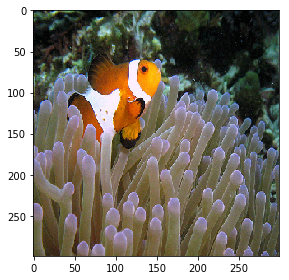

In [31]:
fn = get_projection_to_box_around_orig_point(data_sets.train.x[999], 0.5)
posioned_training_images_temp = fn(poisoned_training_points[0])
render_img(posioned_training_images_temp.reshape((img_side,img_side,num_channels)))
posioned_training_images_temp

((1800, 268203), (1, 268203), (1, 268203), (1, 268203))
Extracting latent space features...


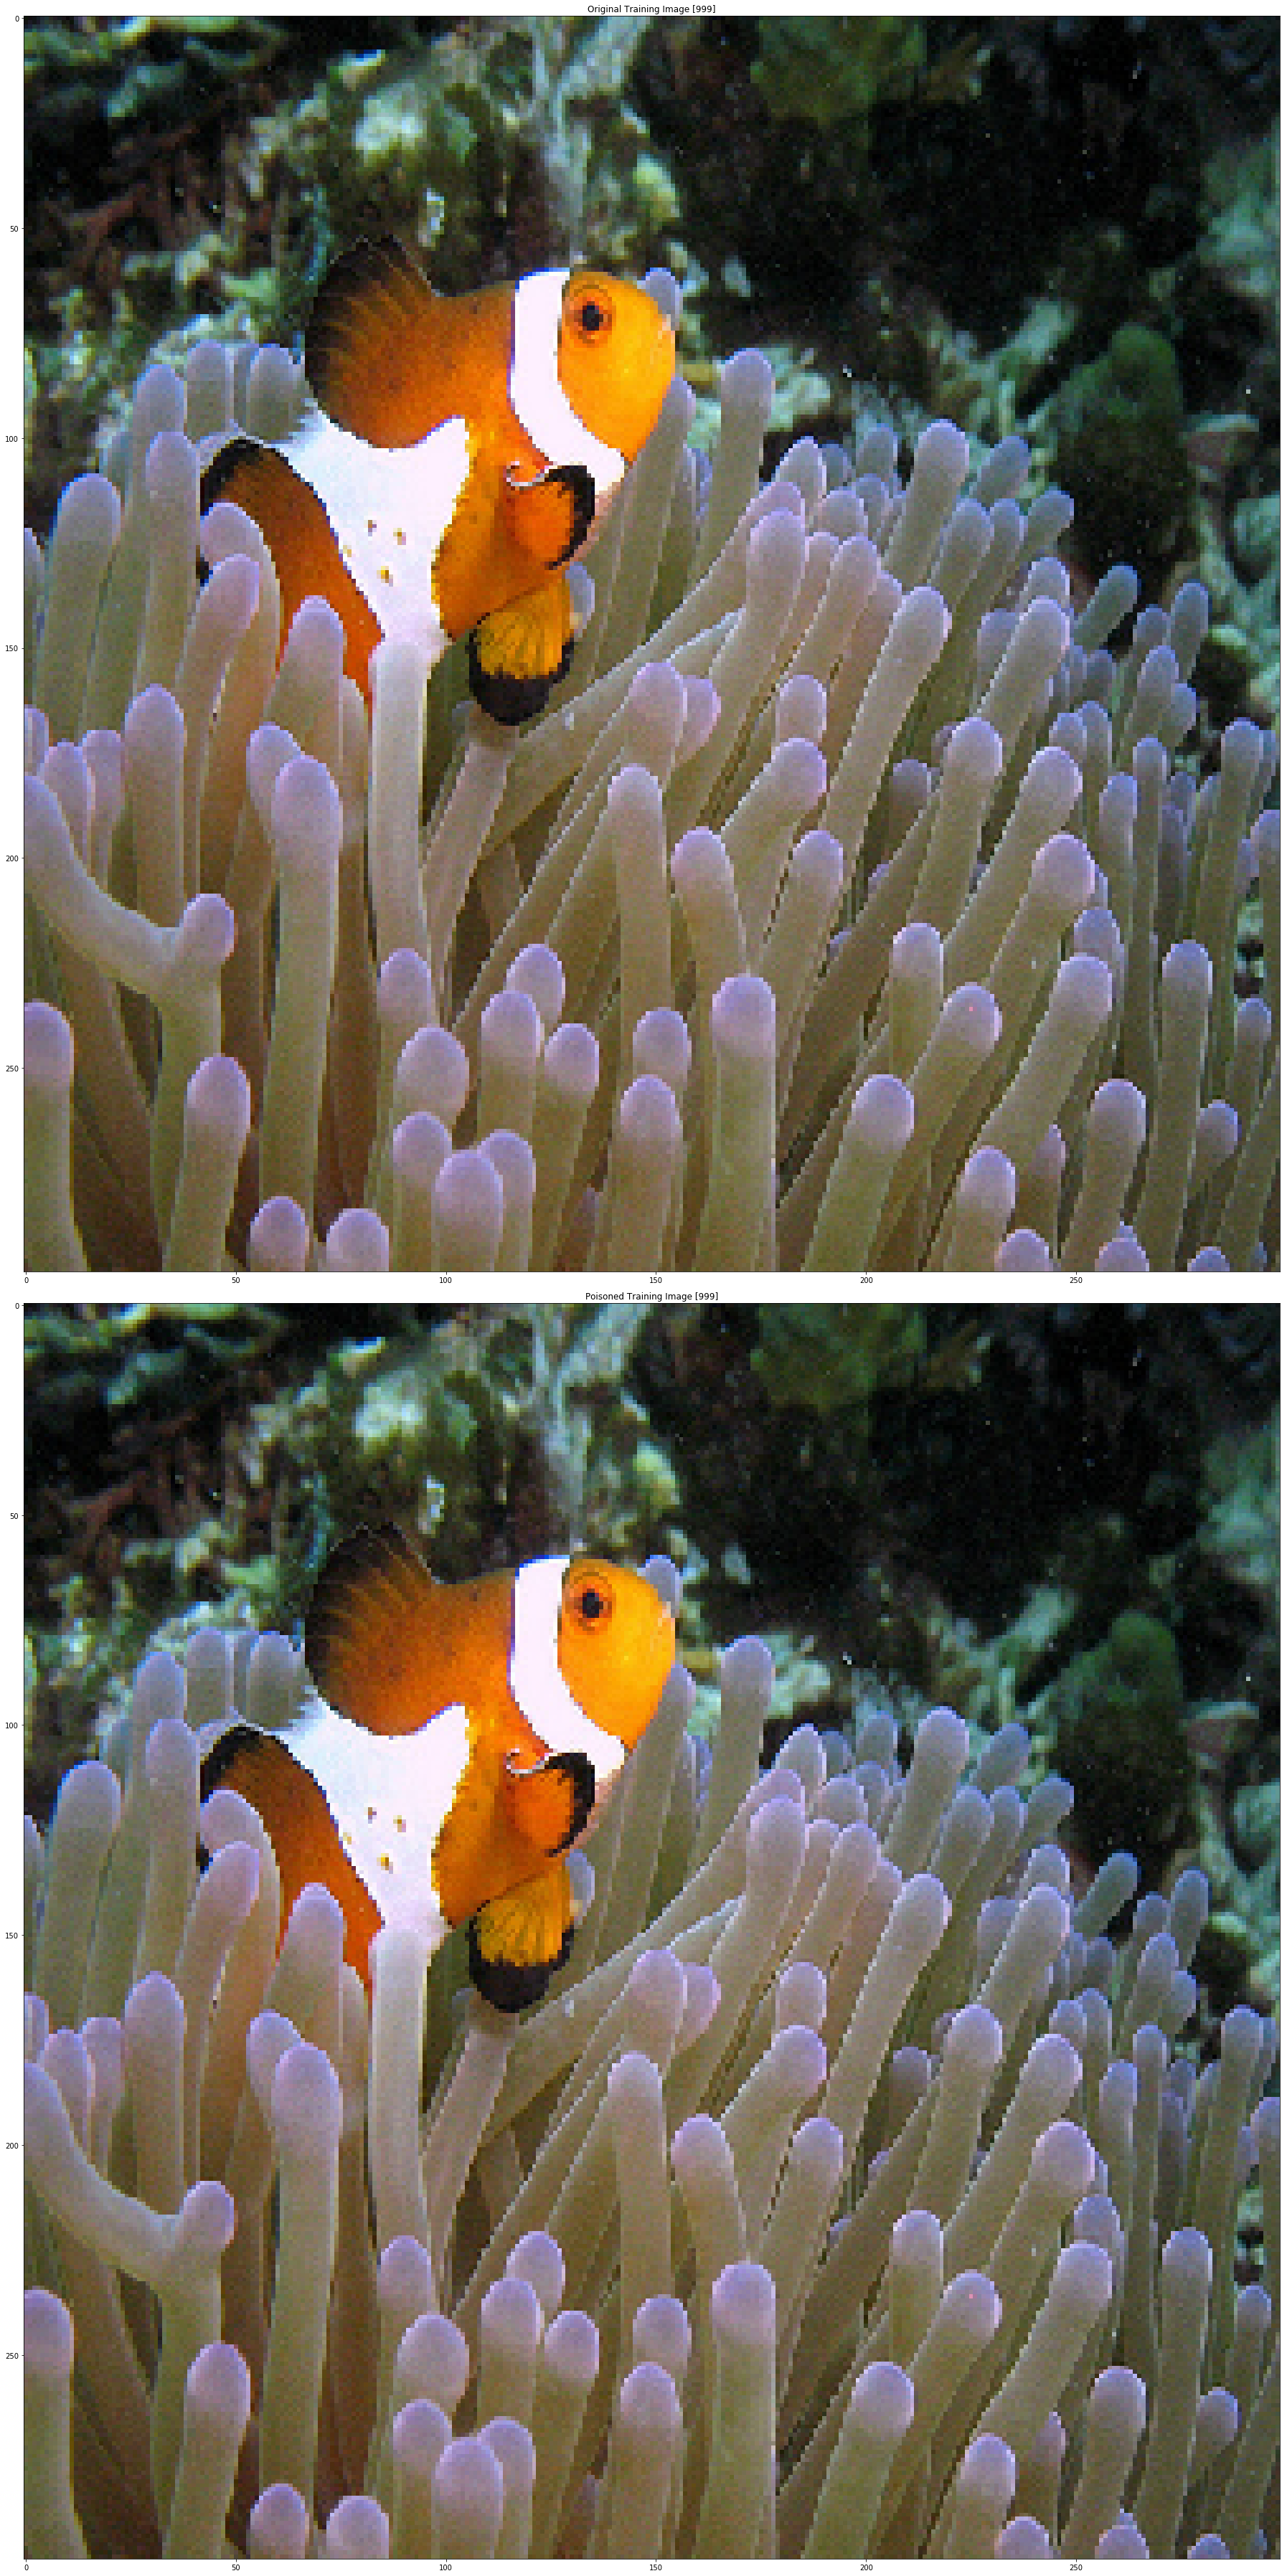

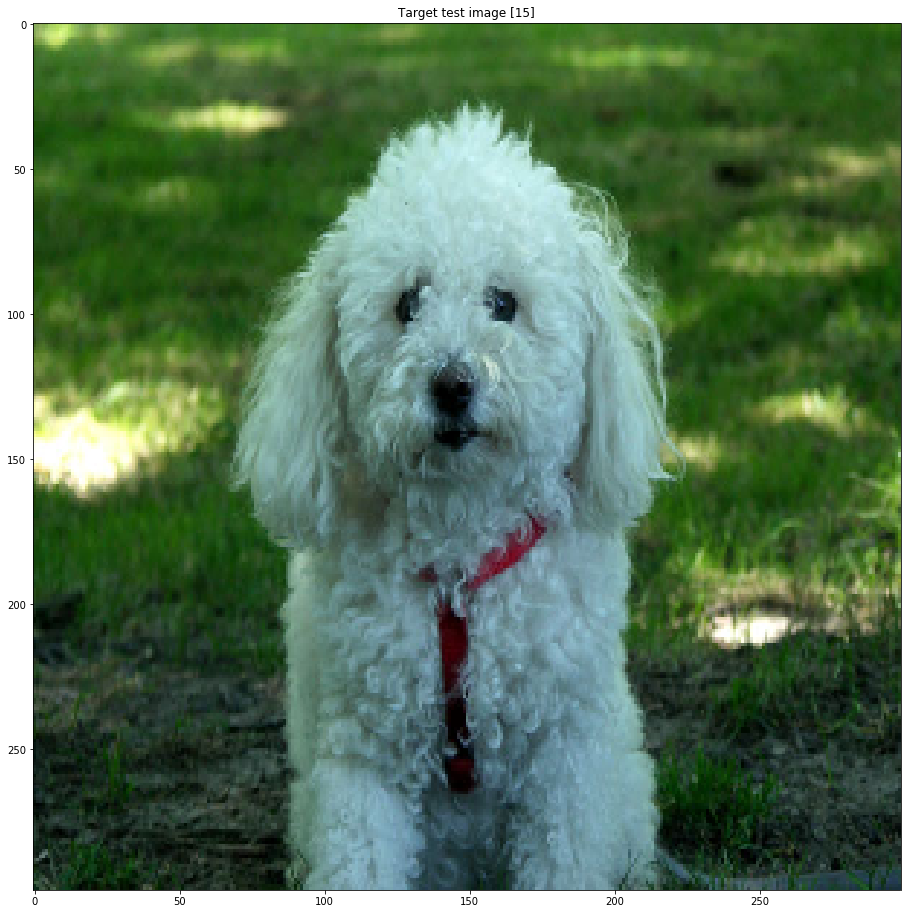

In [77]:
screen_width = 25.

# render relevant images

# clip poisoned images NOT DONE
# if method == "FC":
#     poisoned_training_points_clipped = np.copy(poisoned_training_points).reshape(num_poisoned_training_points, -1)
#     if np.max(poisoned_training_points_clipped, axis=1) > 1 or np.min(poisoned_image) < -1:
#         temp = np.max(poisoned_image_render) - np.min(poisoned_image_render)
#         poisoned_image_render /= temp

poisoned_training_points_clipped = np.asarray([posioned_training_images_temp])

if method == "IF":
    poisoned_training_points_to_render = poisoned_training_points
else:
    poisoned_training_points_to_render = poisoned_training_points_clipped
    
# render original training points and poisoned ones
plt.figure(figsize=(screen_width, screen_width/num_poisoned_training_points * 2))
for i, index_to_poison in enumerate(poisoned_training_points_indices):
    plt.subplot(2,num_poisoned_training_points,i+1)
    plt.title("Original Training Image [{}]".format(index_to_poison))
    render_img(data_sets.train.x[index_to_poison].reshape((img_side,img_side,num_channels)))

for i, (training_point, index_to_poison) in enumerate(zip(poisoned_training_points_to_render, poisoned_training_points_indices)):
    plt.subplot(2,num_poisoned_training_points,num_poisoned_training_points+i+1)
    plt.title("Poisoned Training Image [{}]".format(index_to_poison))
    render_img(training_point.reshape((img_side,img_side,num_channels)))

# render targe test images
plt.figure(figsize=(screen_width,screen_width/num_target_test_points))
for target_index in target_test_points_indices:
    plt.subplot(2,num_poisoned_training_points,i+1)
    plt.title("Target test image [{}]".format(target_index))
    render_img(data_sets.test.x[target_index].reshape((img_side,img_side,num_channels)))
    
# Get tSNE plot

# Extract Inception features
all_dataset_x = np.concatenate([np.copy(data_sets.train.x), 
                                poisoned_training_points, 
                                poisoned_training_points_clipped if method == "FC" else [], 
                                data_sets.test.x[target_test_points_indices]
                               ], axis = 0)
all_dataset_labels = np.concatenate([np.copy(data_sets.train.labels),  
                                     np.copy(data_sets.train.labels[poisoned_training_points_indices]), 
                                     np.copy(data_sets.train.labels[poisoned_training_points_indices]) if method == "FC" else [],
                                     data_sets.test.labels[target_test_points_indices]], axis = 0)
all_dataset = DataSet(all_dataset_x, all_dataset_labels)
print "Extracting latent space features..."
with full_graph.as_default():
    all_inceptions = full_model.generate_inception_features(all_dataset, None)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1803 samples in 0.102s...
[t-SNE] Computed neighbors for 1803 samples in 11.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1803
[t-SNE] Computed conditional probabilities for sample 1803 / 1803
[t-SNE] Mean sigma: 3.947429
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.917076
[t-SNE] Error after 300 iterations: 1.750677


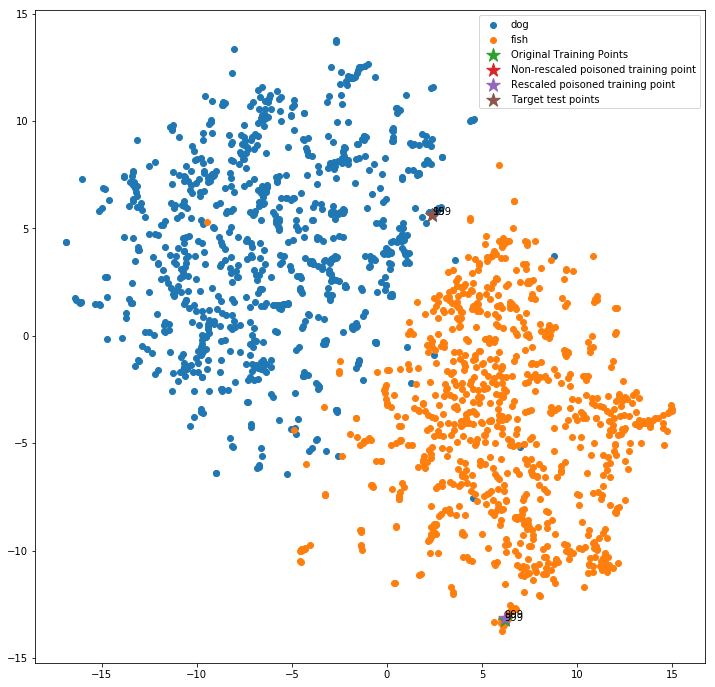

In [78]:
# Calculate tSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=69)
tsne_results = tsne.fit_transform(all_inceptions)

plt.figure(figsize=(12,12))
# plot entire training dataset
for class_label in range(num_classes):
    class_mask = data_sets.train.labels == class_label
    plt.scatter(tsne_results.T[0][:num_training_points][class_mask], 
                tsne_results.T[1][:num_training_points][class_mask], 
                label=training_dataset_classes[class_label]) 

# plot training points before poison
plt.scatter(tsne_results.T[0][poisoned_training_points_indices], 
            tsne_results.T[1][poisoned_training_points_indices], 
            label="Original Training Points", marker='*', s=200)
for index, coordinate in zip(poisoned_training_points_indices, tsne_results[poisoned_training_points_indices]):
    plt.annotate(s=str(index), xy = coordinate)
# plot training points after poison no clipping
plt.scatter(tsne_results.T[0][num_training_points:num_training_points+num_poisoned_training_points], 
            tsne_results.T[1][num_training_points:num_training_points+num_poisoned_training_points], 
            label="Non-rescaled poisoned training point", marker='*', s=200)
for index, coordinate in zip(poisoned_training_points_indices, tsne_results[num_training_points:num_training_points+num_poisoned_training_points]):
    plt.annotate(s=str(index), xy = coordinate)
# plot training points after poison with clipping (if applicable)
if method == "FC":
    plt.scatter(tsne_results.T[0][-num_target_test_points-num_poisoned_training_points:-num_target_test_points], 
                tsne_results.T[1][-num_target_test_points-num_poisoned_training_points:-num_target_test_points], 
                label="Rescaled poisoned training point", marker='*', s=200)
    for index, coordinate in zip(poisoned_training_points_indices, tsne_results[-num_target_test_points-num_poisoned_training_points:-num_target_test_points]):
        plt.annotate(s=str(index), xy = coordinate)
# plot target test points
plt.scatter( tsne_results.T[0][-num_target_test_points:], tsne_results.T[1][-num_target_test_points:], label="Target test points", marker='*', s=200)
for index, coordinate in zip(target_test_points_indices, tsne_results[-num_target_test_points:]):
    plt.annotate(s=str(index), xy = coordinate)

plt.legend()

## Before/after poison comparison

In [82]:
with full_graph.as_default():
    clean_w = full_model.retrain_and_get_weights(data_sets.train.x, data_sets.train.labels)

clean_total_test_logits = full_model.get_preds(data_sets.test, np.arange(len(data_sets.test.x)))
clean_total_test_acc = np.sum(np.argmax(clean_total_test_logits, axis=1) == data_sets.test.labels) / float(num_testing_points)
clean_test_logits = full_model.get_preds(data_sets.test, target_test_points_indices) # target_test_img_indices should be a list

In [90]:
poisoned_data_set_x = np.copy(data_sets.train.x)
poisoned_data_set_x[imgs_to_poison] = poisoned_images
poisoned_data_set_labels = np.copy(data_sets.train.labels)

with full_graph.as_default():
    poisoned_w = full_model.retrain_and_get_weights(poisoned_data_set_x, poisoned_data_set_labels)

poisoned_total_test_logits = full_model.get_preds(data_sets.test, np.arange(len(data_sets.test.x)))
poisoned_total_test_acc = np.sum(np.argmax(poisoned_total_test_logits, axis=1) == data_sets.test.labels) / float(num_testing_points)
poisoned_test_logits = full_model.get_preds(data_sets.test, target_test_points_indices) # target_test_img_indices should be a list

[genericNeuralNet.py:328 -     print_model_eval() ] Train loss (w reg) on all data: [0.01365254]
[genericNeuralNet.py:329 -     print_model_eval() ] Train loss (w/o reg) on all data: [0.00461816]
[genericNeuralNet.py:331 -     print_model_eval() ] Test loss (w/o reg) on all data: [0.04596299]
[genericNeuralNet.py:332 -     print_model_eval() ] Train acc on all data:  [1.]
[genericNeuralNet.py:333 -     print_model_eval() ] Test acc on all data:   [0.98]
[genericNeuralNet.py:335 -     print_model_eval() ] Norm of the mean of gradients: 0.0037951695
[genericNeuralNet.py:336 -     print_model_eval() ] Norm of the params: 4.2507358


In [91]:
poisoned_test_logits

array([[0.49942693, 0.5005731 ]], dtype=float32)